# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

## Goals

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).


## Loading the Data

In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [95]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN



The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [96]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Data Information

Next, there will be a check for the dimensions of the data sets: 
* `species` has 5,824 rows and 4 columns 
* `observations` has 23,296 rows and 3 columns.

In [97]:
print( "(Rows,Colomns)" + str(species.shape))

(Rows,Colomns)(5824, 4)


In [98]:
print( "(Rows,Colomns)" + str(observations.shape))

(Rows,Colomns)(23296, 3)


In [99]:
#see if there is any missing data 
observations.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [100]:
#see if there is any missing data 
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

## Explore the Data

for the question "What is the distribution of conservation status for species?" we must explore some data

In [101]:
#to see how many categories
print("Number of Categories: " +str(species.category.nunique()))
print("Types of Categories:" +str(species.category.unique()))

Number of Categories: 7
Types of Categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [102]:
print("number of conservation statuses: " + str(species.conservation_status.nunique()))
print("unique conservation statuses:" + str(species.conservation_status.unique()))

number of conservation statuses: 4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


There are 5,633 `nan` values which means that they are species without concerns. On the other hand there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery. 

In [103]:
print("nan values: " + str(species.conservation_status.isna().sum()))
print(species.groupby("conservation_status").size())

nan values: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


## Analysis

### What is the distribution of conservation status for species?

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [104]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

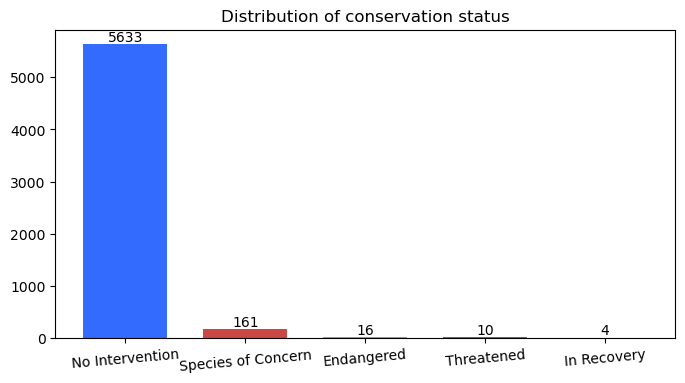

In [105]:
stats = species["conservation_status"].value_counts()
plt.figure(figsize=(8,4))
plt.bar_label(plt.bar(stats.index, stats.values, width = 0.7, color = ['#336BFF',"#C94845","#49D845"]))
plt.xticks(rotation=5)
plt.title("Distribution of conservation status")
plt.show()

### Are certain types of species more likely to be endangered?

include any species that had a value other than `No Intervention`. 

In [106]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [107]:
category_counts = species.groupby(['category', 'is_protected'])\
                                   .scientific_name.nunique()\
                                   .reset_index()\
                                   .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                                   .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']
category_counts['percent_protected'] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


From this analysis, one can see that ~17 percent of mammals were under protection, as well as ~15 percent of birds. 

### Are the differences between species and their conservation status significant?

run some chi-squared tests to see if different species have statistically significant differences in conservation status rates.
The first test will be called contingency1 and will need to be filled with the correct numbers for `Mammal` and `bird`.

The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent.

In [108]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The next pair, is going to test the difference between `Reptile` and `Mammal`.

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

In [109]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

### Which animal is most prevalent and what is their distribution amongst parks?

The first step is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names.

In [110]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

The next step is to clean up duplicate words in each row since they should no be counted more than once per species.

In [111]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next the words need to be collapsed into one list for easier use.

In [112]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now the data is ready to be able to count the number of occurrences of each word. From this analysis, it seems that `Bat` occurred 23 times while `Shrew` came up 18 times.

In [113]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
65,Bat,23
75,Shrew,18
154,Myotis,17
61,Mouse,16
181,Chipmunk,13
184,American,12
30,Squirrel,12
192,Vole,11
115,Eastern,11
88,Western,10


In the data, there are several different scientific names for different types of bats.  The next task is to figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [117]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

Next the results of the bat species will be merged with observations to create a DataFrame with observations of bats across the four national parks.

In [119]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


how many total bat observations(across all species) were made at each national park.

In [92]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


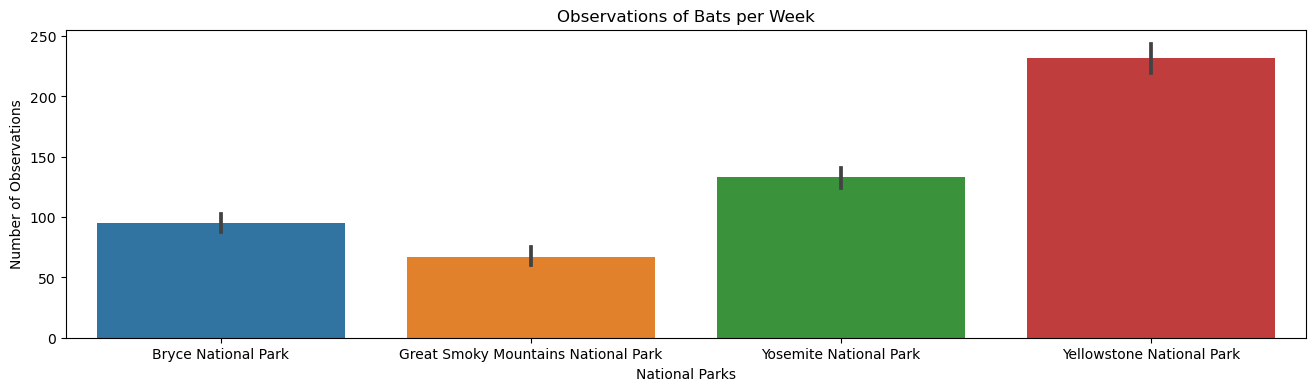

In [120]:
plt.figure(figsize=(16, 4))
sns.barplot(x=bat_observations.park_name, y= bat_observations.observations)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusions

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.